In [ ]:
import pandas as pd
import os

def concatenate_midazolam_csv_files_corrected(directory_path):

    all_files = os.listdir(directory_path)
    midazolam_csv_files = []

    for file_name in all_files:
        if "midazolam" in file_name.lower() and file_name.lower().endswith(".csv"):
            midazolam_csv_files.append(os.path.join(directory_path, file_name))

    if not midazolam_csv_files:
        print(f"No CSV files containing 'midazolam' found in: {directory_path}")
        return None

    print(f"Found {len(midazolam_csv_files)} matching CSV files:")
    for f in midazolam_csv_files:
        print(f"- {os.path.basename(f)}")

    list_of_dfs = []
    for file_path in midazolam_csv_files:
        try:
            df = pd.read_csv(file_path, skiprows=2)

            if 'Standard Units' in df.columns:
                pass
            else:
                print(f"Warning: 'Standard Units' column not found in {os.path.basename(file_path)}")

            list_of_dfs.append(df)
            print(f"Successfully read: {os.path.basename(file_path)}")
        except pd.errors.EmptyDataError:
            print(f"Warning: {os.path.basename(file_path)} is empty after skipping rows. Skipping.")
            continue
        except Exception as e:
            print(f"Error reading {os.path.basename(file_path)}: {e}")
            continue

    if not list_of_dfs:
        print("No DataFrames were successfully read for concatenation.")
        return None

    concatenated_df = pd.concat(list_of_dfs, ignore_index=True)
    print("\nConcatenation complete!")
    print(f"Shape of the concatenated DataFrame: {concatenated_df.shape}")

    return concatenated_df

target_directory = r"../pubchem_data/midazolam"

mid_df = concatenate_midazolam_csv_files_corrected(target_directory)

if mid_df is not None:
    print("\nFirst 5 rows of the concatenated DataFrame:")
    print(mid_df.head())
    print("\nConcatenated DataFrame Info:")
    mid_df.info()


Found 50 matching CSV files:
- AID_1142680_datatable_all_midazolam_5.csv
- AID_1162252_datatable_all_midazolam.csv
- AID_1193163_datatable_all_midazolam_5.csv
- AID_1196554_datatable_all_midazolam_20.csv
- AID_1196555_datatable_all_midazolam_20.csv
- AID_1199779_datatable_all_midazolam.csv
- AID_1226210_datatable_all_midazolam.csv
- AID_1252027_datatable_all_midazolam_5~10.csv
- AID_1280512_datatable_all_midazolam_5~10.csv
- AID_1290553_datatable_all_midazolam_5~10.csv
- AID_1308031_datatable_all_midazolam_5.csv
- AID_1319250_datatable_all_midazolam_5~10.csv
- AID_1319256_datatable_all_midazolam_5`10.csv
- AID_1333177_datatable_all_midazolam_10.csv
- AID_1363111_datatable_all_midazolam_10.csv
- AID_1373037_datatable_all_midazolam_10.csv
- AID_1383126_datatable_all_midazolam_10.csv
- AID_1383785_datatable_all_midazolam_20.csv
- AID_1398478_datatable_all_midazolam_15.csv
- AID_1446093_datatable_all_midazolam.csv
- AID_1517635_datatable_all_midazolam_15.csv
- AID_1583876_datatable_all_mid

In [ ]:
mid_df.head()

,RESULT_DESCR,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Standardized activity type (e.g. IC50 rather than Ic-50/Ic50/ic50/ic-50),"Qualifier (e.g. >, <, =) for 'Standard Value'",Standardized activity value transformed to common units: e.g. mM concentrations converted to nM,Selected units for 'Standard Type': e.g. concentrations are in nM,Additional comments,Comment reflecting whether the values for this activity measurement are likely to be correct
0,1,242633772,54766013,CC1=NC(=CC=C1)C2=C(N=C(N2)CNC3=CC=CC=C3F)C4=CN...,Unspecified,NaN,NaN,NaN,Inhibition,=,44.8,%,NaN,NaN
1,1,312353687,89556026,C1CNC[C@H]([C@@H]1C2=CC=CC=C2)COC3=CC(=C(C=C3F...,Unspecified,NaN,NaN,NaN,Inhibition,=,95.0,%,NaN,NaN
2,2,312353688,71558271,C1CNC[C@H]([C@@H]1C2=CC=C(C=C2)F)COC3=CC(=C(C=...,Unspecified,NaN,NaN,NaN,Inhibition,=,96.0,%,NaN,NaN
3,3,312353689,71558578,C1CNC[C@H]([C@@H]1C2=CC=C(C=C2)Cl)COC3=CC(=C(C...,Unspecified,NaN,NaN,NaN,Inhibition,=,94.0,%,NaN,NaN
4,4,312353689,71558578,C1CNC[C@H]([C@@H]1C2=CC=C(C=C2)Cl)COC3=CC(=C(C...,Unspecified,NaN,NaN,NaN,Inhibition,=,96.0,%,NaN,NaN


In [ ]:
mid_df.columns

Index(['RESULT_DESCR', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7',
       'Standardized activity type (e.g. IC50 rather than Ic-50/Ic50/ic50/ic-50)',
       'Qualifier (e.g. >, <, =) for 'Standard Value'',
       'Standardized activity value transformed to common units: e.g. mM concentrations converted to nM',
       'Selected units for 'Standard Type': e.g. concentrations are in nM',
       'Additional comments',
       'Comment reflecting whether the values for this activity measurement are likely to be correct'],
      dtype='object')

In [ ]:
rename_map = {
    'Unnamed: 3': 'SMILES',
    'Standardized activity type (e.g. IC50 rather than Ic-50/Ic50/ic50/ic-50)': 'Type',
    'Qualifier (e.g. >, <, =) for \'Standard Value\'': 'Qualifier',
    'Standardized activity value transformed to common units: e.g. mM concentrations converted to nM': 'Inhibition',
    "Selected units for 'Standard Type': e.g. concentrations are in nM":"Units"
}

mid_df = mid_df.rename(columns=rename_map, )

print("New column names after renaming:")
print(mid_df.columns)

print("\nFirst 5 rows of the DataFrame with renamed columns:")
print(mid_df.head())

New column names after renaming:
Index(['RESULT_DESCR', 'Unnamed: 1', 'Unnamed: 2', 'SMILES', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Type', 'Qualifier',
       'Inhibition', 'Units', 'Additional comments',
       'Comment reflecting whether the values for this activity measurement are likely to be correct'],
      dtype='object')

First 5 rows of the DataFrame with renamed columns:
   RESULT_DESCR  Unnamed: 1  Unnamed: 2  \
0             1   242633772    54766013   
1             1   312353687    89556026   
2             2   312353688    71558271   
3             3   312353689    71558578   
4             4   312353689    71558578   

                                              SMILES   Unnamed: 4  Unnamed: 5  \
0  CC1=NC(=CC=C1)C2=C(N=C(N2)CNC3=CC=CC=C3F)C4=CN...  Unspecified         NaN   
1  C1CNC[C@H]([C@@H]1C2=CC=CC=C2)COC3=CC(=C(C=C3F...  Unspecified         NaN   
2  C1CNC[C@H]([C@@H]1C2=CC=C(C=C2)F)COC3=CC(=C(C=...  Unspecified         NaN   
3  C1CN

In [ ]:
pre_df = mid_df[['SMILES', 'Type', 'Inhibition', 'Units']]
pre_df.head()

,SMILES,Type,Inhibition,Units
0,CC1=NC(=CC=C1)C2=C(N=C(N2)CNC3=CC=CC=C3F)C4=CN...,Inhibition,44.8,%
1,C1CNC[C@H]([C@@H]1C2=CC=CC=C2)COC3=CC(=C(C=C3F...,Inhibition,95.0,%
2,C1CNC[C@H]([C@@H]1C2=CC=C(C=C2)F)COC3=CC(=C(C=...,Inhibition,96.0,%
3,C1CNC[C@H]([C@@H]1C2=CC=C(C=C2)Cl)COC3=CC(=C(C...,Inhibition,94.0,%
4,C1CNC[C@H]([C@@H]1C2=CC=C(C=C2)Cl)COC3=CC(=C(C...,Inhibition,96.0,%


In [ ]:
pre_df.isnull().sum()

SMILES        0
Type          0
Inhibition    4
Units         4
dtype: int64

In [ ]:
print("\nRows with any null values:")
print(pre_df[pre_df.isnull().any(axis=1)])



Rows with any null values:
                                                SMILES        Type  \
5    C1CNC[C@@H]([C@@H]1C2=CC=C(C=C2)Cl)COC3=CC(=C(...  Inhibition   
77   CC1(CCC(C2=C1C=CC(=C2)C3(OCCO3)C4=CC=C(C=C4)/C...  Inhibition   
78   CC1(CCC(C2=C1C=CC(=C2)C3(OCCO3)C4=CC=C(C=C4)CC...  Inhibition   
102  C1CN(CCN1)C2=NC(=C3C(=N2)N(C=N3)C4=CN=CC=C4)NC...  Inhibition   

     Inhibition Units  
5           NaN   NaN  
77          NaN   NaN  
78          NaN   NaN  
102         NaN   NaN  


In [ ]:
pre_df = pre_df.dropna()

In [ ]:
pre_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 303 entries, 0 to 306
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SMILES      303 non-null    object 
 1   Type        303 non-null    object 
 2   Inhibition  303 non-null    float64
 3   Units       303 non-null    object 
dtypes: float64(1), object(3)
memory usage: 11.8+ KB


In [ ]:
pre_df = pre_df[pre_df['Inhibition'] >= 0]
pre_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 271 entries, 0 to 306
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SMILES      271 non-null    object 
 1   Type        271 non-null    object 
 2   Inhibition  271 non-null    float64
 3   Units       271 non-null    object 
dtypes: float64(1), object(3)
memory usage: 10.6+ KB


In [ ]:
pre_df['Type'].value_counts()

Type
Inhibition    271
Name: count, dtype: int64

In [ ]:
print(f"중복된 행이 존재합니까? {pre_df.duplicated().any()}")

중복된 행이 존재합니까? False


In [ ]:
outliers = pre_df[pre_df['Inhibition'] > 100]
num_outliers = outliers.shape[0]

print(f"\n'Inhibition' 값이 100%를 초과하는 행의 개수: {num_outliers}개")


'Inhibition' 값이 100%를 초과하는 행의 개수: 8개


In [ ]:
if num_outliers > 0:
    print("\n100%를 초과하는 'Inhibition' 값의 행:")
    print(outliers)
    pre_df = pre_df[pre_df['Inhibition'] <= 100]
    print("\n--- Removal Complete ---")
    print(f"'Inhibition' 값이 100%를 초과하는 행의 개수: {pre_df[pre_df['Inhibition'] > 100].shape[0]}개")
    print(f"업데이트된 DataFrame의 새로운 행 개수: {pre_df.shape[0]}개")
    print("\nDataFrame after removing outliers:")
    print(pre_df)
else:
    print("\n'Inhibition' 값이 100%를 초과하는 행이 없습니다.")


100%를 초과하는 'Inhibition' 값의 행:
                                                SMILES        Type  \
238             CCN(CC)CCCC(C)NC1=C2C=CC(=CC2=NC=C1)Cl  Inhibition   
239       CCN(CC)CCCC(C)NC1=C2C=CC(=CC2=NC=C1)C(F)(F)F  Inhibition   
240   CCN(CC)CCCC(C)NC1=C2C=CC(=CC2=NC=C1)OC3=CC=CC=C3  Inhibition   
242  CCCN(CCCNC1=C2C=CC(=CC2=NC=C1)Cl)CC3=C(C=CC(=C...  Inhibition   
248      CCN(CC)CCCC(C)NC1=C2C=CC(=CC2=NC=C1)OC(F)(F)F  Inhibition   
249            CCCN(CCCNC1=C2C=CC(=CC2=NC=C1)Cl)CC3CC3  Inhibition   
257    COC1=CC(=C(C=C1)O)CNCCCNC2=C3C=CC(=CC3=NC=C2)Cl  Inhibition   
258      COC1=CC=CC(=C1O)CNCCCNC2=C3C=CC(=CC3=NC=C2)Cl  Inhibition   

     Inhibition Units  
238       110.0     %  
239       111.0     %  
240       125.0     %  
242       102.0     %  
248       120.0     %  
249       108.0     %  
257       102.0     %  
258       108.0     %  

--- Removal Complete ---
'Inhibition' 값이 100%를 초과하는 행의 개수: 0개
업데이트된 DataFrame의 새로운 행 개수: 263개

DataFrame after removing o

In [ ]:
pre_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, 0 to 306
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SMILES      263 non-null    object 
 1   Type        263 non-null    object 
 2   Inhibition  263 non-null    float64
 3   Units       263 non-null    object 
dtypes: float64(1), object(3)
memory usage: 10.3+ KB


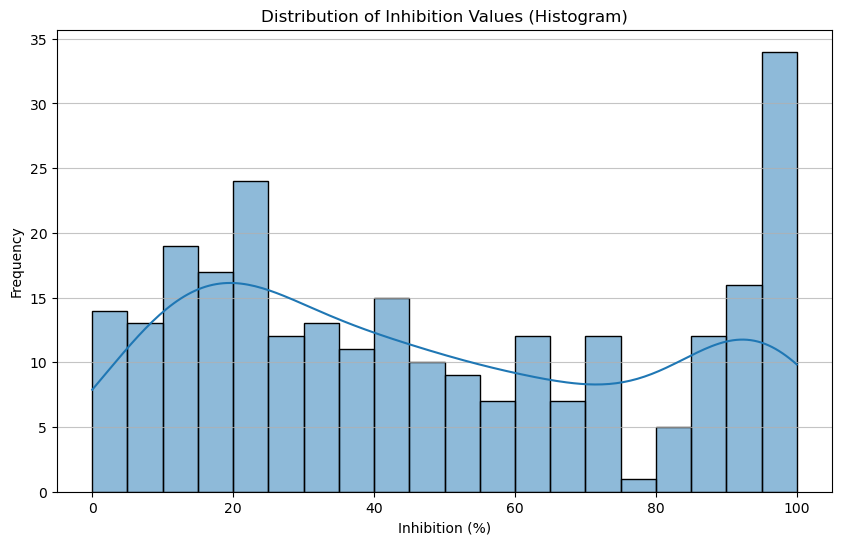

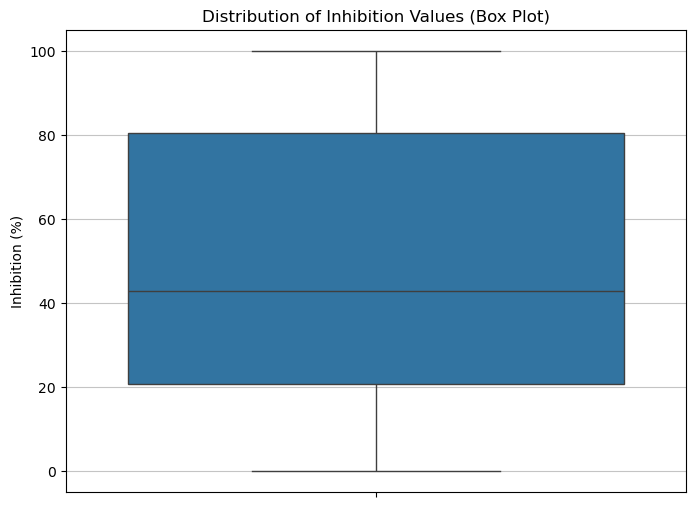

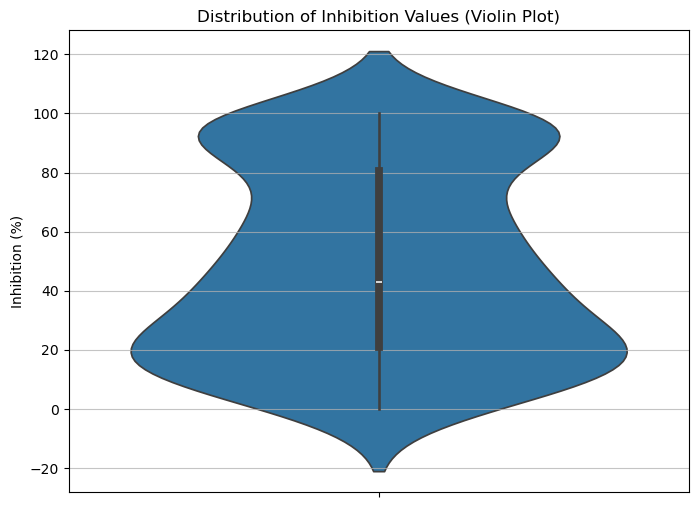


Basic statistics for 'Inhibition' column:
count    263.000000
mean      48.205209
std       32.128412
min        0.000000
25%       20.800000
50%       43.000000
75%       80.500000
max      100.000000
Name: Inhibition, dtype: float64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(pre_df['Inhibition'], bins=20, kde=True)
plt.title('Distribution of Inhibition Values (Histogram)')
plt.xlabel('Inhibition (%)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(y=pre_df['Inhibition'])
plt.title('Distribution of Inhibition Values (Box Plot)')
plt.ylabel('Inhibition (%)')
plt.grid(axis='y', alpha=0.75)
plt.show()

plt.figure(figsize=(8, 6))
sns.violinplot(y=pre_df['Inhibition'])
plt.title('Distribution of Inhibition Values (Violin Plot)')
plt.ylabel('Inhibition (%)')
plt.grid(axis='y', alpha=0.75)
plt.show()

# --- Optional: Describe basic statistics ---
print("\nBasic statistics for 'Inhibition' column:")
print(pre_df['Inhibition'].describe())

In [ ]:
from rdkit import Chem

def canonicalize_smiles(smiles_series):

    canonical_smiles_list = []
    for s in smiles_series:
        if pd.isna(s):
            canonical_smiles_list.append(None)
            continue
        try:
            mol = Chem.MolFromSmiles(str(s))
            if mol is not None:
                canonical_smiles_list.append(Chem.MolToSmiles(mol))
            else:
                canonical_smiles_list.append(None)
        except Exception:
            canonical_smiles_list.append(None)
    return pd.Series(canonical_smiles_list, index=smiles_series.index)

print("Canonicalizing SMILES for pre_df...")
pre_df['Canonical_Smiles'] = canonicalize_smiles(pre_df['SMILES'])

initial_pre_rows = pre_df.shape[0]
pre_df.dropna(subset=['Canonical_Smiles'], inplace=True)
if pre_df.shape[0] < initial_pre_rows:
    print(f"Removed {initial_pre_rows - pre_df.shape[0]} rows due to invalid SMILES during canonicalization.")
else:
    print("No invalid SMILES found during canonicalization.")

final_export_df = pre_df[['Canonical_Smiles', 'Inhibition']]

print("\nFinal DataFrame for export (first 5 rows):")
print(final_export_df.head())


final_export_df.to_csv(r"../processed_data/col_df.csv", index = False)


Canonicalizing SMILES for pre_df...
No invalid SMILES found during canonicalization.

Final DataFrame for export (first 5 rows):
                                    Canonical_Smiles  Inhibition
0  Cc1cccc(-c2[nH]c(CNc3ccccc3F)nc2-c2ccc3ncnn3c2)n1        44.8
1  O=S(=O)(Nc1ncns1)c1cc(F)c(OC[C@@H]2CNCC[C@H]2c...        95.0
2  O=S(=O)(Nc1ncns1)c1cc(F)c(OC[C@@H]2CNCC[C@H]2c...        96.0
3  O=S(=O)(Nc1ncns1)c1cc(F)c(OC[C@@H]2CNCC[C@H]2c...        94.0
4  O=S(=O)(Nc1ncns1)c1cc(F)c(OC[C@@H]2CNCC[C@H]2c...        96.0
